In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer as cntvec
from collections import Counter


emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)


def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=True):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens
 

%matplotlib inline 

In [122]:
cure_df = pd.read_csv('tweets-cure.csv')
prev_df = pd.read_csv('tweets-prevention.csv')
infected_df = pd.read_csv('tweets-infected.csv')

In [123]:
tweet_dfs = [cure_df,prev_df,infected_df]
for tweet_df in tweet_dfs:
    tweet_df.created_at = pd.to_datetime(tweet_df.created_at)

In [124]:
tweet_df = pd.concat(tweet_dfs)

t = list(tweet_df['text'])
t1 = list(cure_df['text'])
t2 = list(prev_df['text'])
t3 = list(infected_df['text'])


tweet_df.label.value_counts()

prevention    1695
cure          1583
infected      1473
dtype: int64

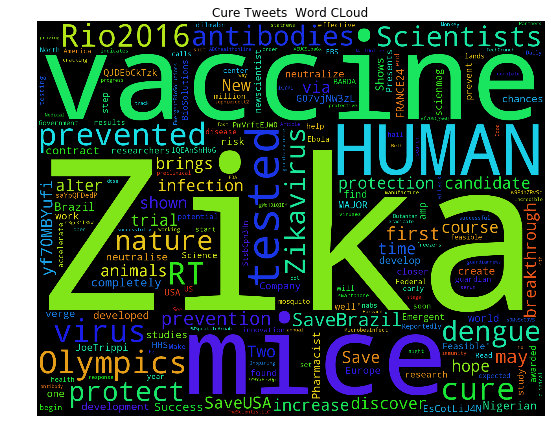

In [125]:
### Word art Generated  for Cure


STOPWORDS.add('https')
STOPWORDS.add('co')
wc = WordCloud(background_color="black",
               stopwords=STOPWORDS,width=1800,
                      height=1400,margin=10)
# generate word cloud
wc = wc.generate(" ".join(t1))
# show
fig2 = plt.figure(figsize = (20,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(121)
ax3.imshow(wc)
ax3.set_title('Cure Tweets  Word CLoud')
plt.axis("off")
plt.show()

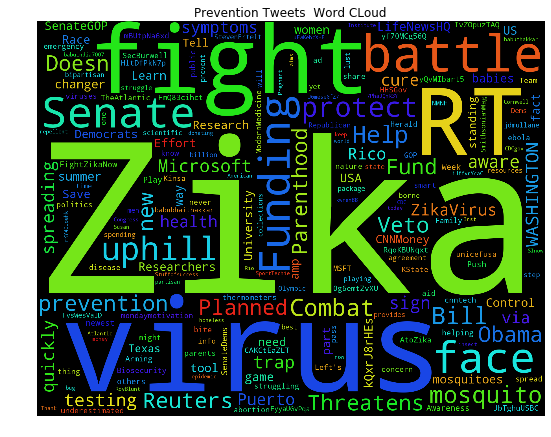

In [126]:
### Word art Generated for Prevention
STOPWORDS.add('https')
STOPWORDS.add('co')
wc = WordCloud(background_color="black",
               stopwords=STOPWORDS,width=1800,
                      height=1400,margin=10)
# generate word cloud
wc = wc.generate(" ".join(t2))
# show
fig2 = plt.figure(figsize = (20,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(121)
ax3.imshow(wc)
ax3.set_title('Prevention Tweets  Word CLoud')
plt.axis("off")
plt.show()

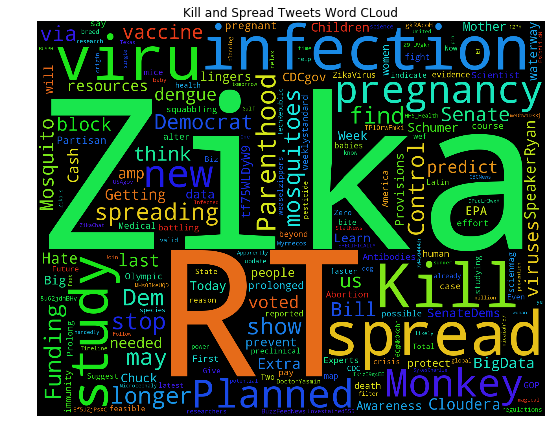

In [127]:
### Word art Generated for damage and kills 
STOPWORDS.add('https')
STOPWORDS.add('co')
wc = WordCloud(background_color="black",
               stopwords=STOPWORDS,width=1800,
                      height=1400,margin=10)
# generate word cloud
wc = wc.generate(" ".join(t3))
# show
fig2 = plt.figure(figsize = (20,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(121)
ax3.imshow(wc)
ax3.set_title('Kill and Spread Tweets Word CLoud')
plt.axis("off")
plt.show()

In [128]:
#Seperating words and removing stop words and punctuation
punc = list(string.punctuation)
stop  = stopwords.words('english') + punc + ['rt','zika','…',"’"] ## Removing the obvious words ('rt' stands for retweet)

In [129]:
# Will generate word clouds for all hash tags in the tweets
# collecting hash tags in each tweet
term_hash=[]
for i in t:
    term_hash.append([tr for tr in preprocess(i,True) if tr not in stop and tr.startswith('#')])

# Mentions in each tweet
term_mention= []
for i in t:
    term_mention.append([tr for tr in preprocess(i,True) if tr not in stop and tr.startswith('@')])

## Collection of urls 
term_urls = []

for i in t:
    term_urls.append([tr for tr in preprocess(i,True) if tr.startswith('http')])




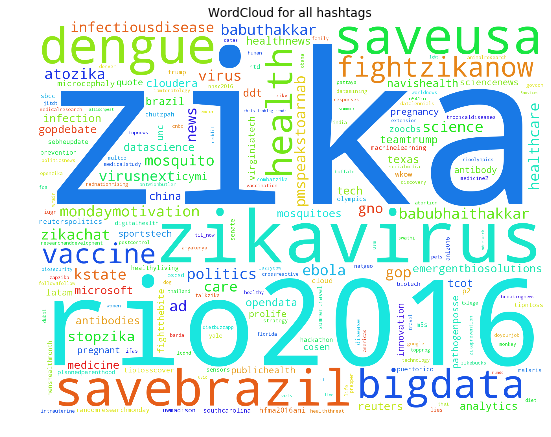

In [130]:

# Word Cloud for hash tags 
hashes= []
for i in term_hash:
    hashes.append((" ".join(i)))

hashes = " ".join(hashes)
    
wc = WordCloud(background_color="white",
               stopwords=STOPWORDS,width=1800,
                      height=1400,margin=10)
# generate word cloud
wc = wc.generate(hashes)
# show
fig2 = plt.figure(figsize = (20,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(121)
ax3.imshow(wc)
ax3.set_title('WordCloud for all hashtags')
plt.axis("off")
plt.show()


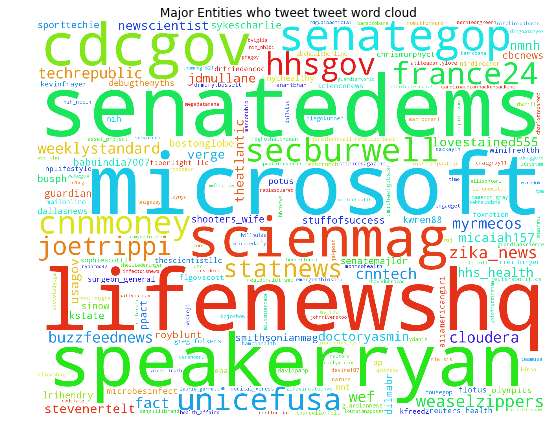

In [131]:
# Word Cloud for mentions  
mentions= []
for i in term_mention:
    mentions.append((" ".join(i)))

mentions = " ".join(mentions)

wc = WordCloud(background_color="white",
               stopwords=STOPWORDS,width=1800,
                      height=1400)
# generate word cloud
wc = wc.generate(mentions)
# show
fig2 = plt.figure(figsize = (20,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(121)
ax3.imshow(wc)
ax3.set_title('Major Entities who tweet tweet word cloud ')
plt.axis("off")
plt.show()


In [132]:
## Terms only
count_all = Counter()
term = []
for i in t:
    term.append([tr for tr in preprocess(i,True) if tr not in stop and  not tr.startswith(('#','@','http')) and not tr.isdigit()])

for i in term:
    count_all.update(i)
    
print(count_all.most_common(10))

[('virus', 1611), ('vaccine', 1305), ('mice', 920), ('humans', 781), ('fight', 745), ('tested', 731), ('olympics', 691), ('prevented', 669), ('funding', 626), ('senate', 537)]


In [133]:
final_terms = []
for i in term:
        final_terms.append(" ".join(i))
print(len(final_terms))
print(len(set(final_terms)))
tweet_df.text = final_terms
tweet_df = tweet_df.drop_duplicates('text')

##Generate word clouds for class wise tweets 
c1 = tweet_df[tweet_df.label=='cure']
c2 = tweet_df[tweet_df.label=='prevention']
c3 = tweet_df[tweet_df.label=='infected']


4751
1471


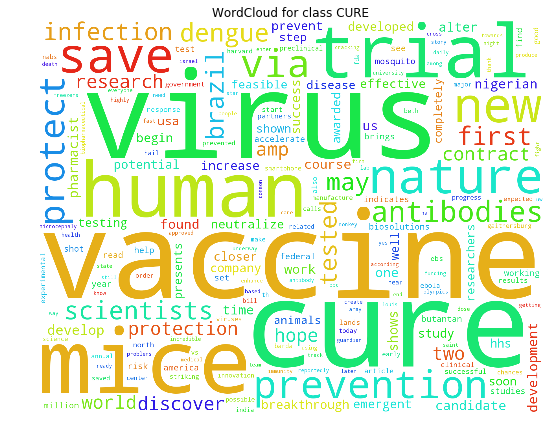

In [134]:
c1 = " ".join(c1.text)

    
wc = WordCloud(background_color="white",
               stopwords=STOPWORDS,width=1800,
                      height=1400,margin=10)
# generate word cloud
wc = wc.generate(c1)
# show
fig2 = plt.figure(figsize = (20,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(121)
ax3.imshow(wc)
ax3.set_title('WordCloud for class CURE')
plt.axis("off")
plt.show()

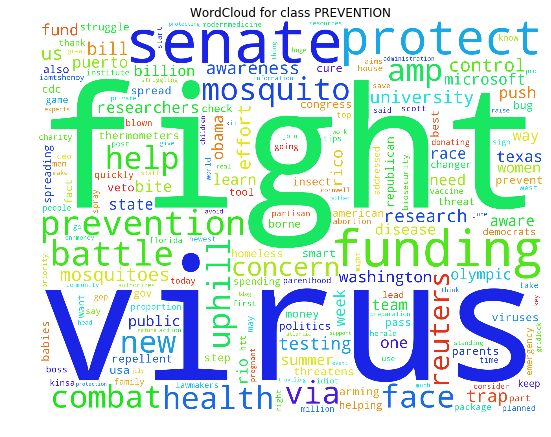

In [135]:
c2 = " ".join(c2.text)
    
wc = WordCloud(background_color="white",
               stopwords=STOPWORDS,width=1800,
                      height=1400,margin=10)
# generate word cloud
wc = wc.generate(c2)
# show
fig2 = plt.figure(figsize = (20,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(121)
ax3.imshow(wc)
ax3.set_title('WordCloud for class PREVENTION')
plt.axis("off")
plt.show()

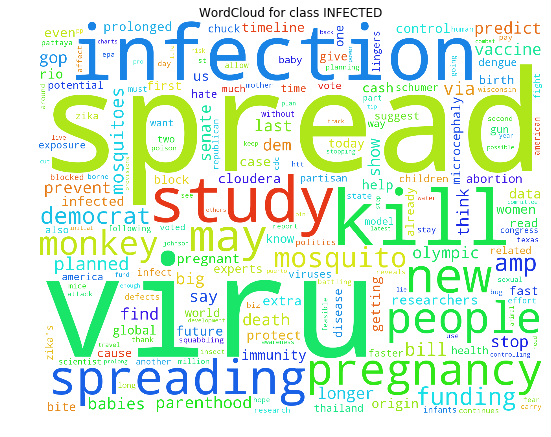

In [136]:
c3 = " ".join(c3.text)
wc = WordCloud(background_color="white",
               stopwords=STOPWORDS,width=1800,
                      height=1400,margin=10)
# generate word cloud
wc = wc.generate(c3)
# show
fig2 = plt.figure(figsize = (20,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(121)
ax3.imshow(wc)
ax3.set_title('WordCloud for class INFECTED')
plt.axis("off")
plt.show()

In [16]:
tweet_df.label.value_counts()

infected      567
prevention    541
cure          363
dtype: int64

In [17]:
vec = cntvec(analyzer = "word")
train_data_features = vec.fit_transform(list(tweet_df.text))

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer as tf
### We have a transformer as well as a vectorizor we can use any one of the above 
### GOing ahead with the transfomrer
##from sklearn.feature_extraction.text import tfidvec
tfvec = tf()
train_data_features = tfvec.fit_transform(train_data_features)


In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import cross_validation
from sklearn import svm
from sklearn import linear_model

y = np.array(tweet_df.label)
"""X_train, X_test, y_train, y_test = train_test_split(train_data_features,tweet_df.label, test_size=0.33,stratify=y)
"""
skf = cross_validation.StratifiedKFold(y, n_folds=3,shuffle=True)

clf2 = linear_model.SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42)

for train_index, test_index in skf:
    X_train, X_test = train_data_features[train_index], train_data_features[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Using SVM linear kernal ")
    clf1 = svm.SVC(kernel='linear').fit(X_train, y_train)
    clf2.fit(X_train,y_train)
    print(clf2.score(X_test,y_test))
    print(clf1.score(X_test, y_test))

    

"""
print("Using NAive bayes")
clf2 = MultinomialNB().fit(X_train, y_train)
print(clf2.score(X_test, y_test))"""

Using SVM linear kernal 
0.887983706721
0.883910386965
Using SVM linear kernal 
0.922448979592
0.90612244898
Using SVM linear kernal 
0.895918367347
0.887755102041


'\nprint("Using NAive bayes")\nclf2 = MultinomialNB().fit(X_train, y_train)\nprint(clf2.score(X_test, y_test))'

In [20]:
clf1 = svm.SVC(kernel='linear')
score = cross_validation.cross_val_score(clf1,train_data_features,y,cv=10,scoring='accuracy')
print(score)
print(score.mean())

[ 0.9261745   0.92567568  0.89864865  0.83673469  0.85714286  0.94557823
  0.93197279  0.88356164  0.91780822  0.82191781]
0.894521506363
